In [1]:
import json
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import base64
import requests
from ytmusicapi import YTMusic as ytm

## Data Collection

### SoundCloud

Data collection is perhaps the most vital part of this report. Since I am doing this study on myself, it is important that I remove as much bias as possible when it comes to which tracks I include in my analysis. To help with this, I looked into the SoundCloud API, as it is what I use most often for my music-listening needs. My hope would be to get some data on what I actually listen to most rather than what I believe is true. 

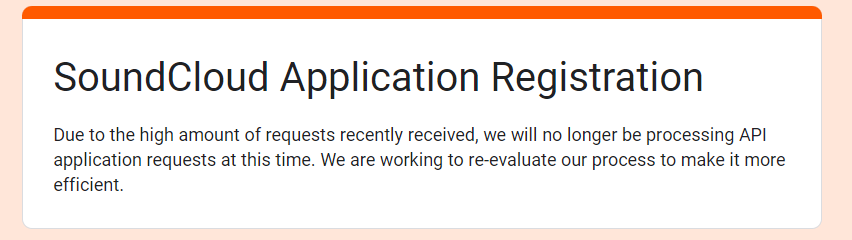

Unfortunately, fate was not very kind to me. Due to SoundCloud's API not accepting new apps, I have no way of utilizing it to help me in my data collection :(

However, I did look into what the API offers if I were able to use it. The silver lining is that the most this API could have done to help me is listing my liked tracks and playlists, which I would then either have to quantify by genre (if possible) or try to directly link these tracks to their equivalent on Spotify in order to access the track data and audio features. 

### YouTube

The next best thing to SoundCloud to get a sample of my music taste is YouTube. I typically like to watch music videos when I'm not in my car or in public, so YouTube is a great tool for that. A lot of the time I simply find the "My Mix" playlist that YouTube auto-generates and put it on in the background, but I also have a few playlists that I made/found depending on the mood I'm in. If I could use the API to assemble these playlists or help work with my data in some way, this would help my data collection process greatly. 

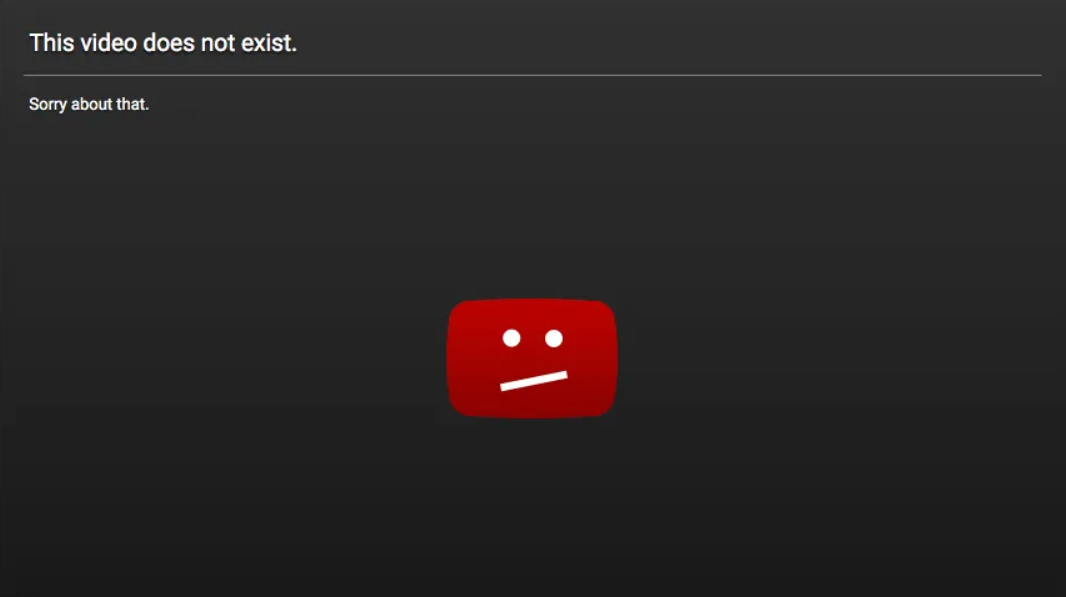

Once again, though, my plans were halted. YouTube's API is not catered towards Music, and they do not provide an API for YouTube Music specifically. The situation would be largely the same as if I were to use SoundCloud's API, as the most I could gain would be the playlist/video IDs and I would then have to compile them in some other way to translate those tracks to Spotify. So unfortunately, I won't be using this API either. 

### YTMusicapi

When I said there wasn't an API for YouTube Music, I meant there wasn't an "official" API. Thankfully, some great people have made a workaround for this issue. The ytmusicapi seems to be a bit better for my purposes, but I was slightly worried that it wouldn't be able to help me since I do not use YouTube Music specifically. After looking into it, though, I was relieved to see that it tracks what I listen to from the main website as well. 

However...

In [ ]:
ytm.setup(filepath="headers_auth.json")

Please paste the request headers from Firefox and press 'Enter, Ctrl-Z, Enter' to continue:
accept: */* accept-encoding: gzip, deflate, br accept-language: en-US,en;q=0.8 authorization: SAPISIDHASH 1670006758_abce12592cda9f1148b2aaa5da81f1c8fbc45e4e content-length: 2153 content-type: application/json cookie: VISITOR_INFO1_LIVE=vbqPbwTal5c; YSC=g4Rr1f-FfAE; YT_CL={"loctok":"APLXd66OIh1h49uCgEWvUM8Kr8ZQr0_AzW2fzlrftq47J2OUJYyImXTznrUacQxB7n_1qbM-AR8b8RdRrWmbZitL-16PXg"}; ajs_anonymous_id=5c745adc-8825-4021-944e-918705926d1a; ajs_user_id=ZNAM34kxJwZjAuwJoCCjA4AXqX63; LOGIN_INFO=AFmmF2swRgIhAJsEV3SVCKEZcYJTo5kwRr6YEmM57cQFbGIKqOUuf0frAiEAmUDplg-8o5x33HJqVz42dF-JgArLMXP_ly6u9H_IK58:QUQ3MjNmd1FCeHV3ZWlKNW5mTGk1N2xuVjh5Zlhlc21KMDEyUVRWYmJRNmozQ1ZPOTF6a3JSX1Y1ZTZMV3NDVnpzTEZRdUhvdlJfVDBfeFUyYzJ5UWhqQWhucmx3ODZnaHJ0M0dnSDBtcEhEMHhiRXI2MzlzTVEzVkF2S2l3Z3NuQlR0eTdweHlXMlA3SVhiOTV0dnhhN1I1UGJRS3EwUDVB; SID=Qwi4jV5DwKbWnbNAuAGvgaFVgLhj3DVUdgAEJ7AXQoAAKc3oc4ey48RDo-OCKQ7AFSQ2pg.; __Secure-1PSID=Qwi4

In [ ]:
ymusic

In [ ]:
ytm('headers_auth.json').get_library_playlists(limit: int = 4)

I couldn't get this API to work for me either. As far as I can tell, I followed all the steps correctly, but once it came to actually using the API it just didn't seem to want to work. The cells never resolved and were just perpetually showing an asterisk next to them. Neither continuing through the prompt nor starting in a new cell gave me any results. 

This API had the most promise in terms of grouping things together neatly, being an unbiased source, and potentially making the process of matching each track up to Spotify automated. Although, I only found an example of the reverse of this automation, and even then, it looked like they were using Google Play Music, which was replaced by YouTube Music. So sadly I am going to have to bail on this one as well. 

### What now?

So with all of my avenues of unbiased data collection exhausted, how can I continue this report in good conscious? Luckily, the purposes of my study is to compare tracks to see what draws me to a particular song rather than what keeps me listening to a song. With that in mind, I shouldn't need to use my most listened-to tracks. Instead, I can simply do an analysis of songs I listen to by genre and make sure that my sample sizes are relatively even. 

My exploration of these other platforms was not in vain, though. While exploring YouTube Music, I found my "2022 Recap," which contains a decent sample of my music taste that I can use as a basis for the tracks I find on Spotify. On top of this, I can also use my SoundCloud playlists, as those are what I usually listen to most. 

## The Data

Through the guidance of my SoundCloud playlists and 2022 Recap, I have gathered a sizable sample of music from various genres/artists. I went through and made specialized Spotify playlists for each group. While manually doing this may have been harder than necessary and risked my internal bias getting in the way, I believe this may have been the best way of going about this, as there were many songs that I was able to omit from my playlists that I do not frequently listen to/have never listened to. Including them by simply taking entire premade albums could have muddied the data and potentially led to false conclusions, so I'm happy I went about the data collection in this way. 

In [2]:
keys = pd.read_csv("Spotify-Keys_10-18-22", header = 0, sep = ",")
appid = keys['Client_ID'][0]
appsecret = keys['Client_Secret'][0]
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"
response = requests.post(access_token_url, headers = header, data = payload)
session_token = response.json()['access_token']
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

The first group is music related to the rhythm game *Friday Night Funkin'* since it is basically its own genre at this point. While none of the songs included are from the original game, they are some of the ones I listen to most frequently. Unfortunately, I was unable to get as many as I would have liked due to them being unavailable on Spotify. 

In [12]:
fnf_id = '7mf0cprxlKPPC87tQShX72'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(fnf_id)
fnf_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
fnf_dict = json.loads(fnf_tracks.text)
newList = []
for x in fnf_dict['items']: newList.append(x['track']['id'])
fnf_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(fnf_track_strings)
fnf_features = requests.get(track_features_endpoint, headers = session_header)
fnf_dict = json.loads(fnf_features.text)
fnf_df = pd.DataFrame(fnf_dict['audio_features'])

Since I'm working with playlists and not albums, the formatting is slightly different, which makes gathering individual track IDs a bit harder. I had to look up a solution as I was having trouble figuring out how to isolate the ID I wanted to grab, so thank you *toobs* from Stack Overflow! I'm still unsure how this worked since there doesn't seem to be anything linking 'track' to 'id', but I'm grateful that it does.

The second group contains songs from the artist *Jackie Extreme.* She is one of my favorite artists and has a very unique style, so I figured grouping her songs together made the most sense. 

In [14]:
je_id = '6D9d7XqQF9sWKc2owPgIYm'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(je_id)
je_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
je_dict = json.loads(je_tracks.text)
newList = []
for x in je_dict['items']: newList.append(x['track']['id'])
je_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(je_track_strings)
je_features = requests.get(track_features_endpoint, headers = session_header)
je_dict = json.loads(je_features.text)
je_df = pd.DataFrame(je_dict['audio_features'])

The third group contains songs by the band *Little Big.* They are a Russian rave band whose style is a mix of hip hop and pop-punk. I got into their music because of some of their more humorous songs, but they also often put a fair bit of social commentary into their work as well (Mostly in the visuals of their music videos, since a lot of their songs don't have very many lyrics). They are also distinct enough to separate into their own category.

In [15]:
lb_id = '4DVCkKp17qpYbGQW2UkVPi'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(lb_id)
lb_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
lb_dict = json.loads(lb_tracks.text)
newList = []
for x in lb_dict['items']: newList.append(x['track']['id'])
lb_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(lb_track_strings)
lb_features = requests.get(track_features_endpoint, headers = session_header)
lb_dict = json.loads(lb_features.text)
lb_df = pd.DataFrame(lb_dict['audio_features'])

Fourth is music from the artist *GHOST and Pals.* They make mostly vocaloid songs, but their style differs from other vocaloid songs enough to put them in a separate category. I also listen to their stuff much more than other Vocaloid artists, so I figured that grouping them separately made the most sense. 

In [16]:
gap_id = '6li4l3SVN8KzhlutvLjK9z'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(gap_id)
gap_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
gap_dict = json.loads(gap_tracks.text)
newList = []
for x in gap_dict['items']: newList.append(x['track']['id'])
gap_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(gap_track_strings)
gap_features = requests.get(track_features_endpoint, headers = session_header)
gap_dict = json.loads(gap_features.text)
gap_df = pd.DataFrame(gap_dict['audio_features'])

Fifth is the rest of the vocaloid genre, or what I listen to from it. Since this genre contains anything that uses a vocaloid, the content of the songs can differ, but they generally have a similar feel to them. I don't believe this will have an adverse effect on the data analysis, but I will be keeping it in mind. 

In [17]:
voc_id = '166sF6qqjePc0RNEDAymVG'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(voc_id)
voc_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
voc_dict = json.loads(voc_tracks.text)
newList = []
for x in voc_dict['items']: newList.append(x['track']['id'])
voc_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(voc_track_strings)
voc_features = requests.get(track_features_endpoint, headers = session_header)
voc_dict = json.loads(voc_features.text)
voc_df = pd.DataFrame(voc_dict['audio_features'])

Sixth is anything related to the game *Five Nights at Freddy's*. I'm not ashamed to admit that I still religiously listen to FNaF music, which is also why this is the category with the largest sample size. For anyone who is unaware, the game *Five Nights at Freddy's* has spawned its own genre of music that has mostly died out at this point, but is still on life-support thanks to a few creators. I'm not entirely sure why it started, but I think it's mostly *The Living Tombstone's* fault, who's music is at the top of the list. 

In [18]:
fnaf_id = '5bxH8jlImkGpOPksToxYPA'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(fnaf_id)
fnaf_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
fnaf_dict = json.loads(fnaf_tracks.text)
newList = []
for x in fnaf_dict['items']: newList.append(x['track']['id'])
fnaf_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(fnaf_track_strings)
fnaf_features = requests.get(track_features_endpoint, headers = session_header)
fnaf_dict = json.loads(fnaf_features.text)
fnaf_df = pd.DataFrame(fnaf_dict['audio_features'])

Seventh contains songs by the artist *SharaX,* who mostly makes music related to the game Undertale, but sometimes the game *Team Fortress 2*, and even original music as well. Her style usually uses instruments in place of lyrics, so watching the videos on YouTube is the most optimal way of enjoying her stuff (unless you've memorized every lyric like I have). 

In [19]:
shx_id = '6a7s1xptiOjKeHzH79Z0Ya'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(shx_id)
shx_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
shx_dict = json.loads(shx_tracks.text)
newList = []
for x in shx_dict['items']: newList.append(x['track']['id'])
shx_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(shx_track_strings)
shx_features = requests.get(track_features_endpoint, headers = session_header)
shx_dict = json.loads(shx_features.text)
shx_df = pd.DataFrame(shx_dict['audio_features'])

Eighth is music by the artist *Bo Burnham.* Most of the music here is from *INSIDE* and *INSIDE: The Outtakes,* but also includes some of his earlier music as well. I've always loved his comedy music and it certainly deserves a category of its own.

In [20]:
bo_id = '6ycTIreGcPQrqtsgxpigtp'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(bo_id)
bo_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
bo_dict = json.loads(bo_tracks.text)
newList = []
for x in bo_dict['items']: newList.append(x['track']['id'])
bo_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(bo_track_strings)
bo_features = requests.get(track_features_endpoint, headers = session_header)
bo_dict = json.loads(bo_features.text)
bo_df = pd.DataFrame(bo_dict['audio_features'])

Ninth is most of the music by the artist *Madame Macabre.* She is an amazing artist that made a lot of creepypasta-related songs. All of her stuff is pleasantly dark, and is definitely in its own category. Some of the songs included here are also FNaF-related, but I included them here both because the FNaF category was too big and because I wanted this category to not be too short.   

In [21]:
mm_id = '22xmyxeDEiubRMRxnM0S5O'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(mm_id)
mm_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
mm_dict = json.loads(mm_tracks.text)
newList = []
for x in mm_dict['items']: newList.append(x['track']['id'])
mm_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(mm_track_strings)
mm_features = requests.get(track_features_endpoint, headers = session_header)
mm_dict = json.loads(mm_features.text)
mm_df = pd.DataFrame(mm_dict['audio_features'])

Tenth is songs by *Billie Eilish.* I'm a fan of her earlier stuff that was a bit darker, but also just enjoy pretty much all of her stuff in general. This is another category that might be better off separated into finer categories, but I will keep an eye on it as well. 

In [23]:
be_id = '16viF7ysjx2FjVpovj6d7b'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(be_id)
be_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
be_dict = json.loads(be_tracks.text)
newList = []
for x in be_dict['items']: newList.append(x['track']['id'])
be_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(be_track_strings)
be_features = requests.get(track_features_endpoint, headers = session_header)
be_dict = json.loads(be_features.text)
be_df = pd.DataFrame(be_dict['audio_features'])

Lastly, I have a Miscellaneous category. I included this for several reasons, the first of which being that I didn't feel like my entire taste in music was captured without it. Mostly though, I wanted to throw a bunch of songs semi-randomly together as somewhat of a control for my analysis. Hopefully this helps disprove any incorrect assumptions if I happen to make them.

In [24]:
misc_id = '1vF19INPusIepThbI2ute1'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(misc_id)
misc_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
misc_dict = json.loads(misc_tracks.text)
newList = []
for x in misc_dict['items']: newList.append(x['track']['id'])
misc_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(misc_track_strings)
misc_features = requests.get(track_features_endpoint,headers = session_header)
misc_dict = json.loads(misc_features.text)
misc_df = pd.DataFrame(misc_dict['audio_features'])

After making the individual DataFrames, I gave them each names under the new 'playlist' column in order to sort them later on.

In [26]:
fnf_df['playlist'] = ['FNF'] * len(fnf_df.index)
je_df['playlist'] = ['Jackie Extreme'] * len(je_df.index)
lb_df['playlist'] = ['Little Big'] * len(lb_df.index)
gap_df['playlist'] = ['GHOST and Pals'] * len(gap_df.index)
voc_df['playlist'] = ['Vocaloid'] * len(voc_df.index)
fnaf_df['playlist'] = ['FNAF'] * len(fnaf_df.index)
shx_df['playlist'] = ['SharaX'] * len(shx_df.index)
bo_df['playlist'] = ['Bo Burnham'] * len(bo_df.index)
mm_df['playlist'] = ['Madame Macabre'] * len(mm_df.index)
be_df['playlist'] = ['Billie Eilish'] * len(be_df.index)
misc_df['playlist'] = ['Miscellaneous'] * len(misc_df.index)

After adding something to differentiate the categories, I shoved them all into one DataFrame and exported them to a file for future use. With all of that dealt with, I can now move onto the data analysis.

In [27]:
audio_features = pd.concat([fnf_df, je_df, lb_df, gap_df, voc_df, fnaf_df, shx_df, bo_df, mm_df, be_df, misc_df])

In [28]:
audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,playlist
0,0.593,0.869,5,-7.528,0,0.0262,0.000688,0.026500,0.0984,0.334,103.006,audio_features,7xI46Xrown39kIBSrXxOVm,spotify:track:7xI46Xrown39kIBSrXxOVm,https://api.spotify.com/v1/tracks/7xI46Xrown39...,https://api.spotify.com/v1/audio-analysis/7xI4...,137476,4,FNF
1,0.460,0.995,6,-3.091,1,0.0489,0.000196,0.000026,0.1020,0.206,102.975,audio_features,7KfOLgPmXLh7OBRannQTsR,spotify:track:7KfOLgPmXLh7OBRannQTsR,https://api.spotify.com/v1/tracks/7KfOLgPmXLh7...,https://api.spotify.com/v1/audio-analysis/7KfO...,146834,4,FNF
2,0.629,0.774,10,-12.339,0,0.0544,0.506000,0.961000,0.1340,0.296,161.943,audio_features,1tnuwCXkCq3WCH1ocwVAag,spotify:track:1tnuwCXkCq3WCH1ocwVAag,https://api.spotify.com/v1/tracks/1tnuwCXkCq3W...,https://api.spotify.com/v1/audio-analysis/1tnu...,128087,4,FNF
3,0.467,0.671,0,-10.817,0,0.0865,0.016900,0.014400,0.0843,0.245,200.116,audio_features,4aMVQBUrFfVhL0vhtxv0KD,spotify:track:4aMVQBUrFfVhL0vhtxv0KD,https://api.spotify.com/v1/tracks/4aMVQBUrFfVh...,https://api.spotify.com/v1/audio-analysis/4aMV...,247399,4,FNF
4,0.615,0.918,9,-8.790,1,0.0677,0.164000,0.063100,0.0724,0.783,158.086,audio_features,2JhIaTWHa6wmEz5df9LwiE,spotify:track:2JhIaTWHa6wmEz5df9LwiE,https://api.spotify.com/v1/tracks/2JhIaTWHa6wm...,https://api.spotify.com/v1/audio-analysis/2JhI...,127423,4,FNF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,0.769,0.924,5,-5.263,0,0.0510,0.596000,0.015600,0.1140,0.880,123.989,audio_features,0thLhIqWsqqycEqFONOyhu,spotify:track:0thLhIqWsqqycEqFONOyhu,https://api.spotify.com/v1/tracks/0thLhIqWsqqy...,https://api.spotify.com/v1/audio-analysis/0thL...,229805,4,Miscellaneous
24,0.675,0.925,0,-3.065,1,0.0433,0.020600,0.003110,0.5680,0.710,132.076,audio_features,58FJeHcQyom7lZbTfyy3bM,spotify:track:58FJeHcQyom7lZbTfyy3bM,https://api.spotify.com/v1/tracks/58FJeHcQyom7...,https://api.spotify.com/v1/audio-analysis/58FJ...,232831,4,Miscellaneous
25,0.722,0.745,7,-4.164,1,0.2560,0.247000,0.000000,0.4190,0.520,77.029,audio_features,5UlnuulVAVmmesw4VzqHdG,spotify:track:5UlnuulVAVmmesw4VzqHdG,https://api.spotify.com/v1/tracks/5UlnuulVAVmm...,https://api.spotify.com/v1/audio-analysis/5Uln...,173381,4,Miscellaneous
26,0.652,0.786,5,-3.761,0,0.0394,0.085900,0.000002,0.0616,0.645,127.941,audio_features,64UmuvjJk7CxLZB6pKTrsS,spotify:track:64UmuvjJk7CxLZB6pKTrsS,https://api.spotify.com/v1/tracks/64UmuvjJk7Cx...,https://api.spotify.com/v1/audio-analysis/64Um...,245625,4,Miscellaneous


In [29]:
audio_features.to_csv('final_audio_features.csv')

In [30]:
fr_af = pd.read_csv('final_audio_features.csv', sep = ',')

Final Notes: I could potentially redo the data collection partially if I find out what was going wrong with the ytmusicapi, but at this point I don't think it will be very helpful. I might be able to use it to make some calculations based on the number of songs from each category in my *2022 Recap,* however, since YouTube is my secondary method of listening to music, the data I could collect from that is most likely not accurate. 

Also, I will be diving more into the differences between the APIs in a later section somewhere closer to the conclusion. I feel like it's better pacing to keep that towards the end seeing as I didn't really end up getting to use them. 